In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv("../data/processed/gladiador_data_procesado.csv")
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


In [3]:
df['Survived'] = df['Survived'].astype(int)
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,0,1
1,7,0.651044,1,0
2,6,0.593816,1,1
3,6,0.540815,0,1
4,12,0.761651,0,1


## MODELO DECISSION TREE CLASSIFIER

In [4]:
X = df[["Wins", "Public Favor", "Allegiance Network_Strong"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7980, 3)
(7980,)
(1996, 3)
(1996,)


In [18]:
#Inicializo y entreno el clasificador de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Realizo Predicciones

# Predicciones sobre el mismo conjunto de datos de entrenamiento
pred_lr = model.predict(X_test)

In [24]:
results_test_df = X_test.copy()
results_test_df['Actual Survived'] = y_test
results_test_df['Predicted Survived'] = pred_lr
print("\nDataFrame con Predicciones para el conjunto de PRUEBA:")
print(results_test_df.head())


DataFrame con Predicciones para el conjunto de PRUEBA:
      Wins  Public Favor  Allegiance Network_Strong  Actual Survived  \
9558     9      0.760859                          1                0   
185     13      0.798874                          1                1   
3712     3      0.550029                          0                0   
7660     8      0.671019                          0                0   
6597    10      0.652175                          1                0   

      Predicted Survived  
9558                   1  
185                    1  
3712                   0  
7660                   0  
6597                   0  


In [21]:
full_predictions = model.predict(X)
df['Predicted Survived'] = full_predictions
print("\nDataFrame original con Predicciones para TODO el conjunto de datos:")
print(df.head())


DataFrame original con Predicciones para TODO el conjunto de datos:
   Wins  Public Favor  Survived  Allegiance Network_Strong  Predicted Survived
0    11      0.841842         0                          1                   1
1     7      0.651044         1                          0                   1
2     6      0.593816         1                          1                   1
3     6      0.540815         0                          1                   0
4    12      0.761651         0                          1                   0


In [25]:
# También puedes predecir para un nuevo dato, por ejemplo:
# Un personaje con 8 victorias, 0.7 de favor público y una red de lealtad fuerte (1)
new_data = pd.DataFrame([[8, 0.7, 1]], columns=["Wins", "Public Favor", "Allegiance Network_Strong"])
new_prediction = model.predict(new_data)

print(f"\nPredicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): {new_prediction[0]}")

if new_prediction[0] == 1:
    print("El modelo predice que este personaje Sobreviviría.")
else:
    print("El modelo predice que este personaje No Sobreviviría.")


Predicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): 1
El modelo predice que este personaje Sobreviviría.


In [26]:
print("MAE: ", mean_absolute_error(y_test, pred_lr))
print("MSE: ", mean_squared_error(y_test, pred_lr))
print("MAPE: ", mean_absolute_percentage_error(y_test, pred_lr))
print("R2: ", r2_score(y_test, pred_lr))

MAE:  0.3627254509018036
MSE:  0.3627254509018036
MAPE:  812272477882454.2
R2:  -0.45090326033154504


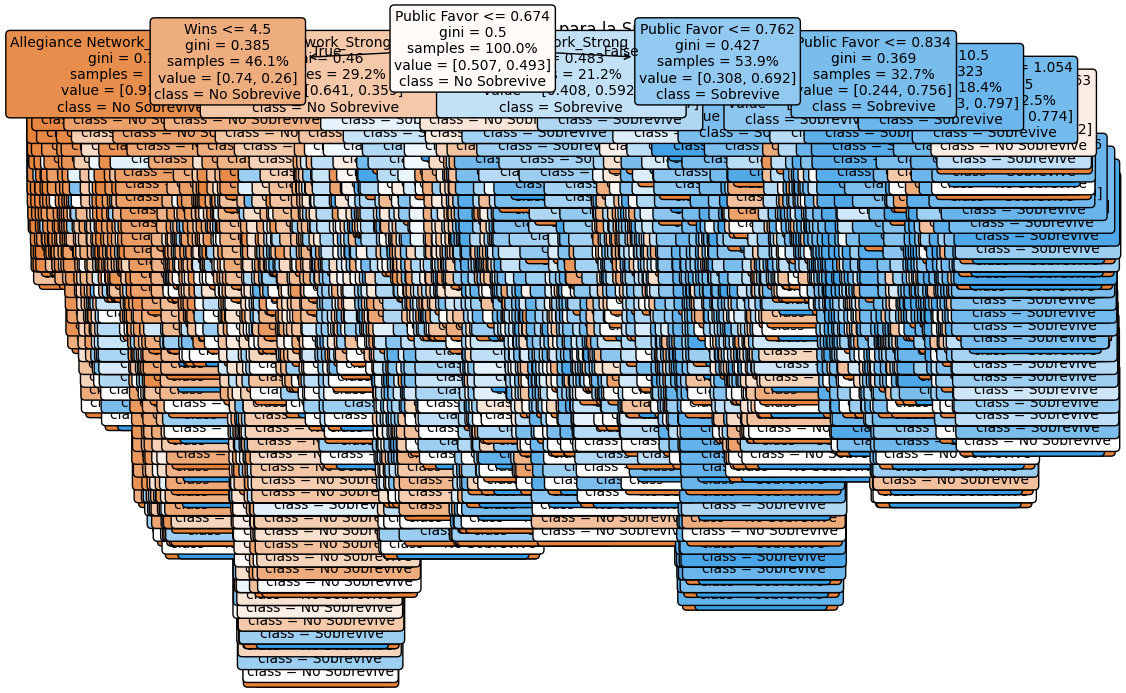

In [ ]:
#Visualizo el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=X.columns.tolist(),  # Nombres de las características
          class_names=['No Sobrevive', 'Sobrevive'],  # Nombres de las clases (0 y 1)
          filled=True,  # Rellenar los nodos con colores
          rounded=True,  # Bordes de los nodos redondeados
          proportion=True, # Mostrar las proporciones de las muestras
          fontsize=10)
plt.title("Árbol de Decisión para la Supervivencia")
plt.show()

In [22]:
#Creo un DataFrame completo de entrenamiento combinando X_train y y_train
train_df = pd.concat([X_train, y_train], axis=1)

#Creo un DataFrame completo de prueba combinando X_test y y_test
test_df = pd.concat([X_test, y_test], axis=1)

# Guardar los DataFrames en archivos CSV
train_df.to_csv("../data/train/train_data.csv", index=False)
test_df.to_csv("../data/test/test_data.csv", index=False)

In [26]:
with open("../models/lr1_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

NameError: name 'lr_model' is not defined


--- Introducir valores para una nueva muestra ---
Por favor, introduce los valores para la nueva muestra:



--- Resultado de la Predicción Manual ---
Predicción: ¡El individuo **SOBREVIVIRÁ** (Clase 1)!
Probabilidad de Sobrevivir: 0.5124


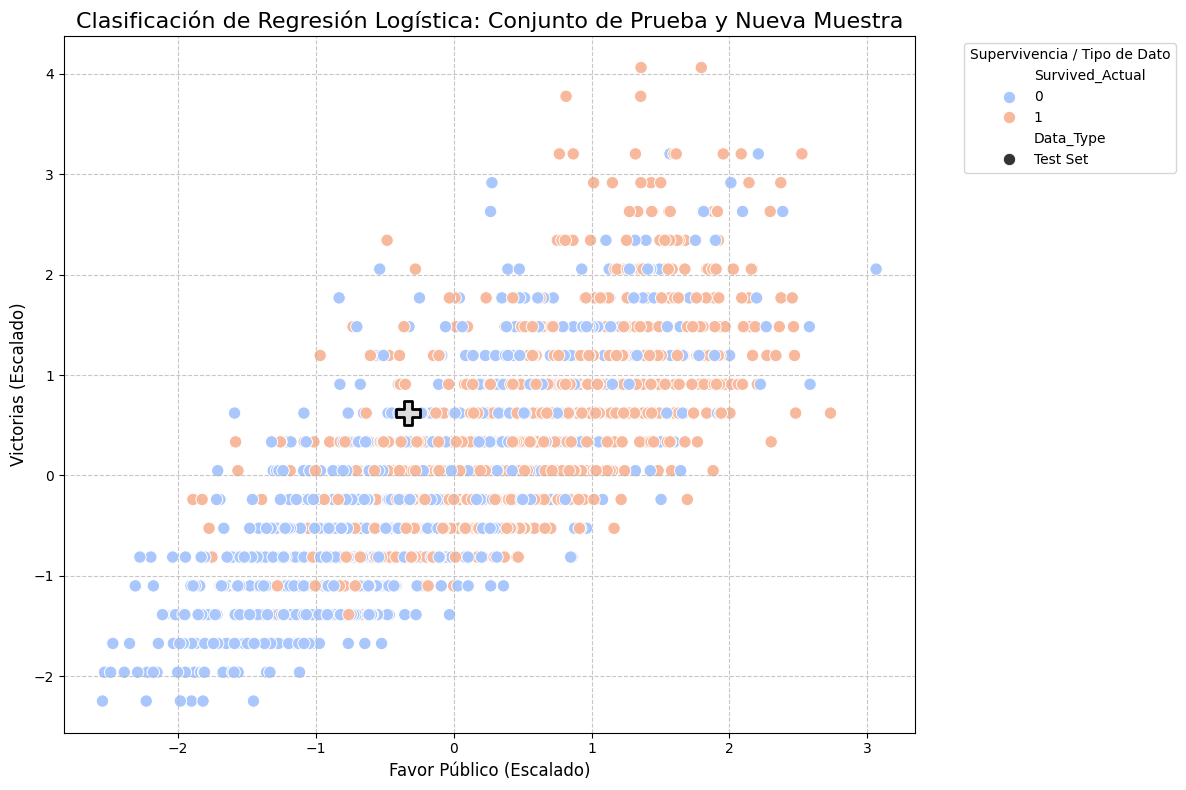

In [ ]:
#Predicción con valores introducidos manualmente
print("\n--- Introducir valores para una nueva muestra ---")
print("Por favor, introduce los valores para la nueva muestra:")

try:
    wins_input = float(input("Victorias (Wins, ej. 10): "))
    public_favor_input = float(input("Favor Público (Public Favor, ej. 0.75, entre 0 y 1): "))
    allegiance_network_strong_input = float(input("Fuerza de Red de Lealtad (Allegiance Network_Strong, ej. 0 o 1): "))

    new_data_manual = pd.DataFrame([[wins_input, public_favor_input, allegiance_network_strong_input]],
                                   columns=['Wins', 'Public Favor', 'Allegiance Network_Strong'])

    new_data_manual_scaled = scaler.transform(new_data_manual)
    predicted_survival = lr_model.predict(new_data_manual_scaled)
    predicted_proba = lr_model.predict_proba(new_data_manual_scaled)[0]

    print("\n--- Resultado de la Predicción Manual ---")
    if predicted_survival[0] == 1:
        print(f"Predicción: ¡El individuo **SOBREVIVIRÁ** (Clase 1)!")
    else:
        print(f"Predicción: El individuo **NO SOBREVIVIRÁ** (Clase 0).")
    print(f"Probabilidad de Sobrevivir: {predicted_proba[1]:.4f}")

    #Visualización
    #Convierto X_test_scaled de nuevo a DataFrame para facilitar la graficación con Seaborn
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
    X_test_scaled_df['Survived_Actual'] = y_test.values
    X_test_scaled_df['Data_Type'] = 'Test Set' #Etiqueta para el conjunto de prueba

    #Uso los valores ESCALADOS para que estén en el mismo rango que X_test_scaled_df
    new_manual_point_df = pd.DataFrame(new_data_manual_scaled, columns=X.columns)
    new_manual_point_df['Survived_Actual'] = predicted_survival[0] #Uso la predicción como su "actual" para el color
    new_manual_point_df['Data_Type'] = 'Nueva Muestra Manual' #Etiqueta para el punto manual


    #Concateno ambos DataFrames para graficar juntos
    #Sólo incluyo las columnas relevantes para el gráfico, en este ejemplo, uso 'Public Favor' y 'Wins'.
    plot_df = pd.concat([
        X_test_scaled_df[['Public Favor', 'Wins', 'Survived_Actual', 'Data_Type']],
        new_manual_point_df[['Public Favor', 'Wins', 'Survived_Actual', 'Data_Type']]
    ])
    #Aseguro que la columna de la clase sea int para el coloreado
    plot_df['Survived_Actual'] = plot_df['Survived_Actual'].astype(int)


    #Genero el Scatterplot con el Punto Manual
    plt.figure(figsize=(12, 8))

    sns.scatterplot(
        x='Public Favor',
        y='Wins',
        hue='Survived_Actual', #Color según la clase real
        style='Data_Type',     #Estilo para diferenciar Test Set y Nueva Muestra
        markers={'Test Set': 'o', 'Nueva Muestra Manual': 'P'}, # 'o' para test, 'P' para el punto manual
        s=80,                  #Tamaño para los puntos del set de prueba
        palette='coolwarm', 
        data=plot_df[plot_df['Data_Type'] == 'Test Set'], #Solo los datos de prueba
        legend='full'
    )

    #Superponer el punto de datos manual
    sns.scatterplot(
        x='Public Favor',
        y='Wins',
        hue='Survived_Actual', #Color según la predicción de la nueva muestra
        style='Data_Type',
        markers={'Test Set': 'o', 'Nueva Muestra Manual': 'P'},
        s=300,                 #Tamaño más grande para el punto manual
        edgecolor='black',     #Borde negro para resaltarlo
        linewidth=2,
        palette='coolwarm',
        data=plot_df[plot_df['Data_Type'] == 'Nueva Muestra Manual'], #Solo el punto manual
        legend=False # No duplicar la leyenda
    )


    plt.title('Clasificación de Regresión Logística: Conjunto de Prueba y Nueva Muestra', fontsize=16)
    plt.xlabel('Favor Público (Escalado)', fontsize=12)
    plt.ylabel('Victorias (Escalado)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Supervivencia / Tipo de Dato', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

except ValueError:
    print("\nEntrada inválida. Asegúrate de introducir números para los valores.")
except KeyError as e:
    print(f"\nError de columna: {e}. Asegúrate de que las columnas 'Wins', 'Public Favor' y 'Allegiance Network_Strong' existan en tu DataFrame original y que las estés nombrando correctamente.")
except Exception as e:
    print(f"\nOcurrió un error general: {e}")